### 과정
- 데이터의 측정 영역을 대표하는 클러스 중심(Cluster Center)을 찾는다.
- 데이터 포인터(샘플, 행, 레코드)를 가장 가까운 클러스터 중심에 할당.
- 새로 할당된 포인트를 포함한 평균값으로 클러스 중심을 다시 지정.
- 클러스에 할당되는 데이터 포인터에 변화가 없을 때까지 작업을 반복.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. make_blobs toy data
X, y = datasets.make_blobs(random_state = 1)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [3]:
# 2. checking labels
kmeans.labels_ # 클러스트 행 끼리 묶음

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [4]:
# 3. X.predict
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

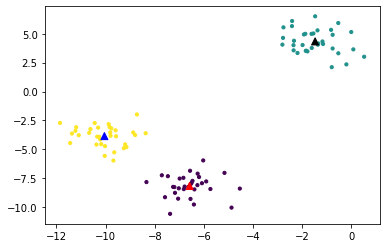

In [5]:
# 4. scatter graph
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, marker = 'o', s= 10)
# c = 각 군집도에 따른 color, s = size
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], # centers -> 3개가 필요해서
            c = ['r', 'k', 'b'], marker= '^', s = 50)
plt.show()

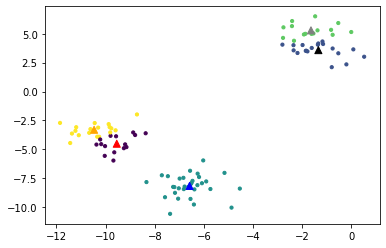

In [6]:
# 5. k = 5 
kmeans5 = KMeans(n_clusters = 5)
kmeans5.fit(X)
assign = kmeans5.labels_

plt.scatter(X[:, 0], X[:, 1], c = kmeans5.labels_, marker = 'o', s= 10)
# c = 각 군집도에 따른 color, s = size
plt.scatter(kmeans5.cluster_centers_[:, 0], 
            kmeans5.cluster_centers_[:, 1], # centers -> 3개가 필요해서
            c = ['r', 'k', 'b', 'gray', 'orange'], marker= '^', s = 50)
plt.show()

In [7]:
# 토너먼트 시각화 (엘보우 그래프)

### 병합 군집
- 시작할 때, 각각의 포인터 하나하나가 클러스터로 지정된다.
- 종료조건을 만족할 때까지 가장 비슷한 두 클러스를 합쳐나간다.
- 사이킷런의 종료 조건은 클러스티의 개수
- linkage 옵션에서 가장 비슷한 클러스트를 측정하는 방법을 지정(ward, average, complete)
        Ward : 두 클러스터를 합쳐 나가는 방식에는 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합치는 방식 
        
        Average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합치는 방식
        
        Complete: 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합치는 방식

        ( Ward 방식이 대부분의 데이터 세트에 알맞게 동작 )
                
- 계층적 클러스터링 : 군집 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터의 개수를 줄여가는 방법

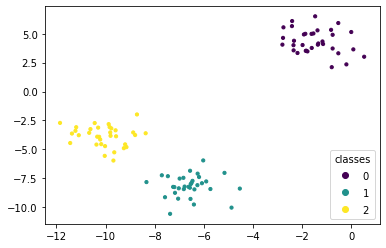

In [8]:
from sklearn.cluster import AgglomerativeClustering
X, y = datasets.make_blobs(random_state = 1)
agg = AgglomerativeClustering(n_clusters = 3)
assign = agg.fit_predict(X)

fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c = assign, marker= 'o', s = 10)
ax.legend(*scatter.legend_elements(), # * -> 값을 얻어옴.
          loc=4, title= 'classes')

In [9]:
agg.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

Text(0, 0.5, 'cluster distance')

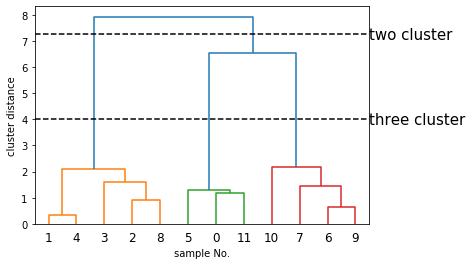

In [10]:
# 댄드로그램(Dendrogram)
from scipy.cluster.hierarchy import dendrogram, ward

X, y = datasets.make_blobs(random_state = 0, n_samples = 12)

# ward : 분산을 최소화하는 방향으로 클러스터링을 수행한다.
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c = 'k')
ax.plot(bounds, [4, 4], '--', c = 'k')

ax.text(bounds[1], 7.25, 'two cluster', va = 'center', 
        fontdict={'size':15})
ax.text(bounds[1], 4, 'three cluster', va = 'center',
        fontdict={'size':15})
plt.xlabel('sample No.')
plt.ylabel('cluster distance')

### DBSCAN
- 클러스터의 개수를 미리 정할 필요가 없다.
- 복잡한 형상도 찾을 수 있고, 어떤 클래스도 속하지 않은 포인터를 비교적 잘 구분해낸다.
- 병합군집과 k-means보다 느리다

#### 방법
- 특성 공간에서 가까이 있는 데이터가 많은, 밀도가 높은 지역의 포인터를 찾는다.
- 데이터 밀집 지역의 한 클러스터를 구성하며, 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 아이디어에서 시작
- min_sample와 eps 두 개의 매개변수
- 시작할 때 모자이크 포인터 선택

cluster label :  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


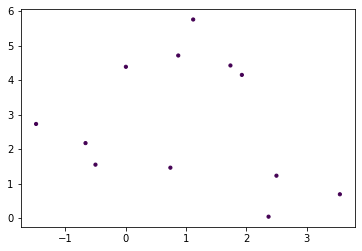

In [11]:
from sklearn.cluster import DBSCAN

X, y = datasets.make_blobs(random_state = 0, n_samples = 12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('cluster label : ', clusters)
# noise(군집으로 분류 되지 않음)

plt.scatter(X[:, 0], X[:, 1], c = clusters, marker='o', s = 10)

cluster label2 :  [0 1 1 1 1 0 0 0 1 0 0 0]


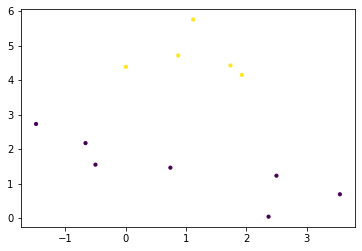

In [12]:
X, y = datasets.make_blobs(random_state = 0, n_samples = 12)

# eps 안에 min_sample 정도 없으면 잡음(noise)로 처리
dbscan2 = DBSCAN(min_samples = 2, eps = 2) # 최소 2개, eps(거리) = 2 
clusters2 = dbscan2.fit_predict(X)
print('cluster label2 : ', clusters2)

plt.scatter(X[:, 0], X[:, 1], c = clusters2, marker='o', s = 10)